# 网易云毕业项目：国产烂片深度揭秘

## 1.烂片初探

In [638]:
import pandas as pd
import numpy as np

In [639]:
df = pd.read_excel("moviedata.xlsx") 
df.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
0,坏孩子的秋天,263.0,7.5,暂无,肖政 / 施大生 / 贾媛媛 / 王静,中国大陆,NaN,邓科,90,剧情 / 儿童,陆长河,汉语普通话,0.220,0.424,0.280,0.059,0.017
1,黑猫大旅社 黑貓大旅社,514.0,6.8,不详,陆奕静 / 老鄧 （夏靖庭 ） / 蔡振南,台湾,Hotel Black Cat,徐丽雯,112,剧情,徐丽雯,台湾国语,0.102,0.332,0.453,0.091,0.022
2,追捕,NaN,NaN,2018-02(香港),张涵予 / 戚薇 / 福山雅治 / 河智苑 / 国村隼 / 池内博之 / 樱庭奈奈美 / ...,香港,Manhunt,吴宇森,NaN,剧情 / 动作,吴宇森 / 阮世生 / 西村寿行,NaN,0.000,0.000,0.000,0.000,0.000
3,无问西东,NaN,NaN,2018(中国大陆),章子怡 / 张震 / 黄晓明 / 王力宏 / 陈楚生 / 韩童生 / 王盛德 / 姚晨 /...,中国大陆,Forever Young,李芳芳,NaN,剧情 / 爱情 / 战争,李芳芳,汉语普通话,0.000,0.000,0.000,0.000,0.000
4,绣春刀II：修罗战场,NaN,NaN,2017-07(中国大陆),张震 / 杨幂 / 张译 / 雷佳音 / 辛芷蕾 / 李媛,中国大陆,绣春刀前传 / 绣春刀：修罗场 / 绣春刀2：修罗战场,路阳,NaN,动作 / 武侠 / 古装,陈舒,汉语普通话,0.000,0.000,0.000,0.000,0.000


In [640]:
df["豆瓣评分"].isnull().sum() # 豆瓣评分含有151个空值

151

In [641]:
df = df[df["豆瓣评分"]>0] # 把评分为空值的删除

In [642]:
df["豆瓣评分"].isnull().sum() # 评分的空值已被删除

0

In [643]:
df["豆瓣评分"].describe() # 认为四分位数（25%处）为“烂片标准”，即4.3分

count    2306.000000
mean        5.604250
std         1.595514
min         2.100000
25%         4.300000
50%         5.700000
75%         6.800000
max         9.300000
Name: 豆瓣评分, dtype: float64

In [644]:
import matplotlib.pyplot as plt

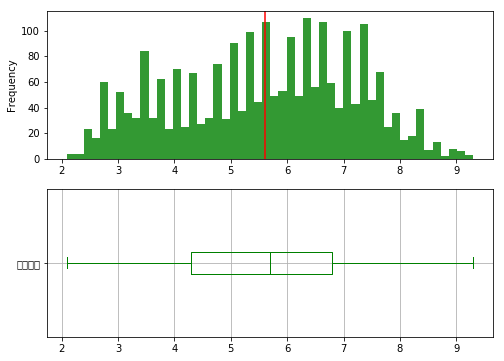

In [645]:
plt.subplot(211) # 将两个图绘制于一体
ax1 = data["豆瓣评分"].plot.hist(bins= 50,color="g",alpha=0.8,figsize=(8,6)) 
plt.axvline(data["豆瓣评分"].mean(), c= "red")
plt.subplot(212)
ax2 = data["豆瓣评分"].plot.box(vert=False,grid=True,color="g")
plt.show()

In [646]:
lp = df[df["豆瓣评分"] < 4.3] # 筛选评分小于4.3的数据

In [647]:
len(lp) #  烂片有546条

546

In [648]:
lp_top20 = lp[["电影名称","豆瓣评分","主演","导演"]].sort_values(by = "豆瓣评分").iloc[:20].reset_index(drop = True) # drop=True去除之前的index

In [649]:
lp_top20

,电影名称,豆瓣评分,主演,导演
0,渡灵人,2.1,王磊 / 邱佩霞 / 杜冯欣怡 / 郑礼宇,孔令杭
1,白日杀机,2.2,张小仟 / 章宇 / 郑诺 / 亦涵,张帆
2,大震撼,2.2,石小群 / 宫哲 / 徐爽 / 齐如意 / 姚心蕊 / 崔可法 / 卢彦西,崔立新
3,戚继光英雄传,2.2,NaN,姚林 / 杨清峰 / 吴鲁光 / 沈丹冶
4,B区32号,2.3,邓紫衣 / 唐宸禹 / 李锐,吕建民
5,找个高富帅？,2.3,徐申东 / 张惠鑫 / 曲昱曈 / 王乐天 / 王妍 / 闫美伊 / 陈童 / 李飞,陈童
6,换脸新娘,2.3,翟文斌 / 吴菲 / 褚颖颖 / 林娜,林云翔
7,皇帝的新装之圣诞大明星,2.3,NaN,李霞
8,整形归来,2.4,苏菲 / 张乃歌 / 张慧雯,张翔宇
9,火星归来,2.4,马诺 / 胡北 / 高森鹏 / 刘谋峰 / Edward Zee,刘谋峰


## 2.什么类型烂片最多？

In [650]:
df = df[df["类型"].notnull()] # 此处的df是已删除“评分”和“类型”空值后的数据

In [651]:
types = df["类型"].values.tolist()
types

[' 剧情 / 儿童',
 ' 剧情',
 ' 剧情',
 ' 短片',
 ' 爱情 / 科幻',
 ' 纪录片 / 传记',
 ' 剧情',
 ' 悬疑 / 奇幻',
 ' 剧情 / 动作 / 悬疑 / 犯罪',
 ' 剧情',
 ' 爱情 / 科幻',
 ' 喜剧 / 动作 / 冒险',
 ' 动画 / 奇幻',
 ' 喜剧 / 爱情 / 奇幻',
 ' 剧情 / 爱情 / 同性',
 ' 剧情',
 ' 喜剧 / 动画 / 家庭',
 ' 悬疑 / 奇幻 / 冒险',
 ' 爱情',
 ' 剧情 / 喜剧 / 爱情 / 同性',
 ' 剧情 / 动作 / 奇幻',
 ' 悬疑 / 惊悚',
 ' 悬疑 / 惊悚 / 恐怖',
 ' 悬疑 / 恐怖 / 犯罪',
 ' 爱情 / 奇幻',
 ' 喜剧 / 爱情',
 ' 喜剧 / 爱情 / 古装',
 ' 喜剧',
 ' 剧情 / 动作 / 犯罪',
 ' 剧情 / 爱情',
 ' 爱情 / 悬疑 / 惊悚',
 ' 喜剧 / 爱情 / 科幻',
 ' 剧情',
 ' 爱情 / 同性 / 古装',
 ' 科幻 / 动画 / 儿童 / 冒险',
 ' 纪录片',
 ' 剧情',
 ' 剧情',
 ' 剧情 / 爱情 / 奇幻',
 ' 爱情',
 ' 剧情',
 ' 动画 / 短片',
 ' 惊悚 / 恐怖',
 ' 动画 / 奇幻',
 ' 悬疑 / 惊悚 / 恐怖',
 ' 剧情',
 ' 喜剧 / 爱情',
 ' 悬疑 / 惊悚',
 ' 悬疑 / 惊悚',
 ' 剧情',
 ' 喜剧 / 古装',
 ' 剧情',
 ' 喜剧 / 动画',
 ' 喜剧',
 ' 喜剧 / 爱情',
 ' 剧情',
 ' 纪录片',
 ' 喜剧 / 爱情',
 ' 喜剧 / 动作 / 爱情 / 古装',
 ' 真人秀',
 ' 剧情 / 犯罪',
 ' 剧情 / 短片 / 同性',
 ' 古装',
 ' 动作 / 犯罪',
 ' 剧情 / 爱情 / 悬疑 / 惊悚',
 ' 剧情',
 ' 爱情 / 短片',
 ' 剧情 / 爱情',
 ' 惊悚 / 恐怖',
 ' 喜剧 / 动作 / 古装',
 ' 剧情 / 喜剧',
 ' 剧情 / 动作 / 奇幻 / 古装',
 ' 喜剧',
 ' 剧情 / 喜剧',
 ' 爱情 / 奇

In [652]:
type_list = []
for type in types:
    ty = type.split(" / ")
    ty = [i.strip() for i in ty]
    type_list.extend(ty)
type_list

['剧情',
 '儿童',
 '剧情',
 '剧情',
 '短片',
 '爱情',
 '科幻',
 '纪录片',
 '传记',
 '剧情',
 '悬疑',
 '奇幻',
 '剧情',
 '动作',
 '悬疑',
 '犯罪',
 '剧情',
 '爱情',
 '科幻',
 '喜剧',
 '动作',
 '冒险',
 '动画',
 '奇幻',
 '喜剧',
 '爱情',
 '奇幻',
 '剧情',
 '爱情',
 '同性',
 '剧情',
 '喜剧',
 '动画',
 '家庭',
 '悬疑',
 '奇幻',
 '冒险',
 '爱情',
 '剧情',
 '喜剧',
 '爱情',
 '同性',
 '剧情',
 '动作',
 '奇幻',
 '悬疑',
 '惊悚',
 '悬疑',
 '惊悚',
 '恐怖',
 '悬疑',
 '恐怖',
 '犯罪',
 '爱情',
 '奇幻',
 '喜剧',
 '爱情',
 '喜剧',
 '爱情',
 '古装',
 '喜剧',
 '剧情',
 '动作',
 '犯罪',
 '剧情',
 '爱情',
 '爱情',
 '悬疑',
 '惊悚',
 '喜剧',
 '爱情',
 '科幻',
 '剧情',
 '爱情',
 '同性',
 '古装',
 '科幻',
 '动画',
 '儿童',
 '冒险',
 '纪录片',
 '剧情',
 '剧情',
 '剧情',
 '爱情',
 '奇幻',
 '爱情',
 '剧情',
 '动画',
 '短片',
 '惊悚',
 '恐怖',
 '动画',
 '奇幻',
 '悬疑',
 '惊悚',
 '恐怖',
 '剧情',
 '喜剧',
 '爱情',
 '悬疑',
 '惊悚',
 '悬疑',
 '惊悚',
 '剧情',
 '喜剧',
 '古装',
 '剧情',
 '喜剧',
 '动画',
 '喜剧',
 '喜剧',
 '爱情',
 '剧情',
 '纪录片',
 '喜剧',
 '爱情',
 '喜剧',
 '动作',
 '爱情',
 '古装',
 '真人秀',
 '剧情',
 '犯罪',
 '剧情',
 '短片',
 '同性',
 '古装',
 '动作',
 '犯罪',
 '剧情',
 '爱情',
 '悬疑',
 '惊悚',
 '剧情',
 '爱情',
 '短片',
 '剧情',
 '爱情',
 '惊悚',
 '恐怖',
 '喜剧',
 '

In [653]:
typelist=list(set(type_list)) # 去重
typelist

['脱口秀',
 '恐怖',
 '奇幻',
 '动作',
 '历史',
 '悬疑',
 '冒险',
 '武侠',
 '运动',
 '战争',
 '鬼怪',
 'News',
 '剧情',
 '情色',
 '灾难',
 '爱情',
 '短片',
 '同性',
 '真人秀',
 '纪录片',
 '歌舞',
 '犯罪',
 '西部',
 '惊悚',
 '科幻',
 '古装',
 '儿童',
 '舞台艺术',
 '动画',
 '戏曲',
 '音乐',
 '家庭',
 '喜剧',
 '传记',
 '黑色电影']

In [654]:
len(typelist)

35

In [655]:
a=[]
for i in np.arange(len(typelist)):
    b={"typename":typelist[i],"typecount":len(df["类型"].str.contains(typelist[i]))}
    a.append(b)
a1=pd.DataFrame(a)
a1

,typecount,typename
0,2100,脱口秀
1,2100,恐怖
2,2100,奇幻
3,2100,动作
4,2100,历史
5,2100,悬疑
6,2100,冒险
7,2100,武侠
8,2100,运动
9,2100,战争


In [656]:
def f1(data,typei):
    dic_type_lp={}
    datai=data[data["类型"].str.contains(typei)]
    lp_pre_i=len(datai[datai["豆瓣评分"]<4.3])/len(datai)
    dic_type_lp["typename"]=typei
    dic_type_lp["typecount"]=len(datai)
    dic_type_lp["type_lp_pre"]= lp_pre_i
    return dic_type_lp

In [657]:
lst_type_lp=[]
for i in typelist:
    print(f1(df,i))
    lst_type_lp.append(f1(df,i))

df_type_lp=pd.DataFrame(lst_type_lp)    
df_type_lp

{'typename': '脱口秀', 'typecount': 7, 'type_lp_pre': 0.0}
{'typename': '恐怖', 'typecount': 69, 'type_lp_pre': 0.5797101449275363}
{'typename': '奇幻', 'typecount': 84, 'type_lp_pre': 0.34523809523809523}
{'typename': '动作', 'typecount': 307, 'type_lp_pre': 0.250814332247557}
{'typename': '历史', 'typecount': 68, 'type_lp_pre': 0.1323529411764706}
{'typename': '悬疑', 'typecount': 216, 'type_lp_pre': 0.4074074074074074}
{'typename': '冒险', 'typecount': 85, 'type_lp_pre': 0.3764705882352941}
{'typename': '武侠', 'typecount': 59, 'type_lp_pre': 0.0847457627118644}
{'typename': '运动', 'typecount': 11, 'type_lp_pre': 0.09090909090909091}
{'typename': '战争', 'typecount': 68, 'type_lp_pre': 0.17647058823529413}
{'typename': '鬼怪', 'typecount': 3, 'type_lp_pre': 0.3333333333333333}
{'typename': 'News', 'typecount': 1, 'type_lp_pre': 0.0}
{'typename': '剧情', 'typecount': 972, 'type_lp_pre': 0.14609053497942387}
{'typename': '情色', 'typecount': 12, 'type_lp_pre': 0.6666666666666666}
{'typename': '灾难', 'typecount'

,type_lp_pre,typecount,typename
0,0.000000,7,脱口秀
1,0.579710,69,恐怖
2,0.345238,84,奇幻
3,0.250814,307,动作
4,0.132353,68,历史
5,0.407407,216,悬疑
6,0.376471,85,冒险
7,0.084746,59,武侠
8,0.090909,11,运动
9,0.176471,68,战争


In [658]:
# from collections import Counter

## 3.和什么国家合作更容易生产烂片？

In [828]:
df = pd.read_excel("moviedata.xlsx") # 重新载入下数据

In [829]:
df = df[df["豆瓣评分"]>0] # 把评分为空值的删除

In [830]:
df = df[["电影名称","制片国家/地区","豆瓣评分"]]
df = df[df["制片国家/地区"].notnull()] # 筛选出制片地区不为空的数据
len(df) # 此处的df为删除“评分”和“制片地区”空值的数据

2306

In [831]:
df_loc=df.loc[df["制片国家/地区"].str.contains("中国大陆")]

In [832]:
locs = df_loc["制片国家/地区"].values.tolist()
locs

[' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆 / 香港',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆 / 香港',
 ' 中国大陆',
 ' 中国大陆 / 香港',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 香港 / 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆 / 香港',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆 / 泰国',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆 / 香港',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆 / 香港',
 ' 中国大陆 / 加拿大',
 ' 香港 / 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆 / 美国',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆 / 俄罗斯',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆',
 ' 中国大陆'

In [833]:
loc_list = []
for loc in locs:
    lo = loc.split(" / ")
    lo = [i.strip() for i in lo]
    loc_list.extend(lo)
loc_list

['中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '香港',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '香港',
 '中国大陆',
 '中国大陆',
 '香港',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '香港',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '香港',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '泰国',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '香港',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '香港',
 '中国大陆',
 '加拿大',
 '香港',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '美国',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '俄罗斯',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '中国大陆',
 '香港',
 '中国大陆',
 '中国大陆',
 '香港',
 '中国大陆',
 '中国大陆',


In [834]:
loc_list=list(set(loc_list)) #去重
loc_list

['朝鲜',
 '卢森堡',
 '日本',
 '加拿大',
 '蒙古国',
 '英国',
 '美国',
 '香港',
 '澳大利亚',
 '新西兰',
 '新加坡',
 '韩国',
 '中国',
 '法国',
 '中国大陆',
 '西班牙',
 '马来西亚',
 '南非',
 '德国',
 '以色列',
 '泰国',
 '印度',
 '比利时',
 '俄罗斯',
 'Malaysia',
 '丹麦',
 '台湾']

In [835]:
loc_list.remove("中国大陆")
loc_list.remove("香港")
loc_list.remove("中国")
loc_list.remove("台湾")
loc_list

['朝鲜',
 '卢森堡',
 '日本',
 '加拿大',
 '蒙古国',
 '英国',
 '美国',
 '澳大利亚',
 '新西兰',
 '新加坡',
 '韩国',
 '法国',
 '西班牙',
 '马来西亚',
 '南非',
 '德国',
 '以色列',
 '泰国',
 '印度',
 '比利时',
 '俄罗斯',
 'Malaysia',
 '丹麦']

In [836]:
def f2(data,loci):
    dic_loc_lp={}
    datai=data[data["制片国家/地区"].str.contains(loci)]
    loc_pre_i=len(datai[datai["豆瓣评分"]<4.3])/len(datai)
    dic_loc_lp["locname"]=loci
    dic_loc_lp["loccount"]=len(datai)
    dic_loc_lp["loc_lp_pre"]= loc_pre_i
    return dic_loc_lp

In [837]:
lst_loc_lp=[] # 创建空字典
for i in loc_list:
    dici=f2(df_loc,i)
    lst_loc_lp.append(dici)

In [838]:
df_loc_lp=pd.DataFrame(lst_loc_lp)
df_loc_lp=df_loc_lp[df_loc_lp["loccount"]>=3]
loc_lp_top20=df_loc_lp.sort_values(by="loc_lp_pre",ascending=False).iloc[:20]
loc_lp_top20

,loc_lp_pre,loccount,locname
5,0.750000,4,英国
6,0.333333,21,美国
9,0.333333,3,新加坡
15,0.250000,4,德国
10,0.157895,19,韩国
11,0.100000,10,法国
2,0.071429,14,日本
3,0.000000,6,加拿大
7,0.000000,3,澳大利亚


## 4.卡司数与烂片的关系

In [839]:
df = pd.read_excel("moviedata.xlsx") # 重新读取数据
df.head()

,电影名称,豆瓣评论数,豆瓣评分,上映日期,主演,制片国家/地区,又名,导演,片长,类型,编剧,语言,r5,r4,r3,r2,r1
0,坏孩子的秋天,263.0,7.5,暂无,肖政 / 施大生 / 贾媛媛 / 王静,中国大陆,NaN,邓科,90,剧情 / 儿童,陆长河,汉语普通话,0.220,0.424,0.280,0.059,0.017
1,黑猫大旅社 黑貓大旅社,514.0,6.8,不详,陆奕静 / 老鄧 （夏靖庭 ） / 蔡振南,台湾,Hotel Black Cat,徐丽雯,112,剧情,徐丽雯,台湾国语,0.102,0.332,0.453,0.091,0.022
2,追捕,NaN,NaN,2018-02(香港),张涵予 / 戚薇 / 福山雅治 / 河智苑 / 国村隼 / 池内博之 / 樱庭奈奈美 / ...,香港,Manhunt,吴宇森,NaN,剧情 / 动作,吴宇森 / 阮世生 / 西村寿行,NaN,0.000,0.000,0.000,0.000,0.000
3,无问西东,NaN,NaN,2018(中国大陆),章子怡 / 张震 / 黄晓明 / 王力宏 / 陈楚生 / 韩童生 / 王盛德 / 姚晨 /...,中国大陆,Forever Young,李芳芳,NaN,剧情 / 爱情 / 战争,李芳芳,汉语普通话,0.000,0.000,0.000,0.000,0.000
4,绣春刀II：修罗战场,NaN,NaN,2017-07(中国大陆),张震 / 杨幂 / 张译 / 雷佳音 / 辛芷蕾 / 李媛,中国大陆,绣春刀前传 / 绣春刀：修罗场 / 绣春刀2：修罗战场,路阳,NaN,动作 / 武侠 / 古装,陈舒,汉语普通话,0.000,0.000,0.000,0.000,0.000


In [840]:
df["主演人数"]=df["主演"].str.split("/").str.len() # 统计每部片主演多少人
df["主演人数"]

0        4.0
1        3.0
2       11.0
3       11.0
4        6.0
5        3.0
6        5.0
7        9.0
8        5.0
9        4.0
10       3.0
11       5.0
12       2.0
13      11.0
14      11.0
15       9.0
16       4.0
17       6.0
18       5.0
19       4.0
20       3.0
21       NaN
22       7.0
23       2.0
24       8.0
25       6.0
26       4.0
27       5.0
28       4.0
29       5.0
        ... 
2427     3.0
2428    12.0
2429     2.0
2430     3.0
2431     8.0
2432     5.0
2433     3.0
2434     5.0
2435     3.0
2436     6.0
2437     3.0
2438     3.0
2439     5.0
2440     NaN
2441     4.0
2442     4.0
2443     3.0
2444     NaN
2445     1.0
2446     4.0
2447     2.0
2448     5.0
2449     2.0
2450     1.0
2451     3.0
2452     NaN
2453     3.0
2454     2.0
2455     NaN
2456    10.0
Name: 主演人数, Length: 2457, dtype: float64

In [841]:
df_leadrole1=df[["主演人数","豆瓣评分"]].groupby("主演人数").count()#两个列名以上的要加两个中括号
df_leadrole1

,豆瓣评分
主演人数,
1.0,75
2.0,198
3.0,382
4.0,269
5.0,263
6.0,203
7.0,157
8.0,158
9.0,111


In [842]:
df_leadrole2=df[["主演人数","豆瓣评分"]][df["豆瓣评分"]<4.3].groupby("主演人数").count()
df_leadrole2

,豆瓣评分
主演人数,
1.0,4
2.0,26
3.0,68
4.0,49
5.0,72
6.0,58
7.0,64
8.0,57
9.0,36


In [843]:
df_leadrole_pre = pd.merge(df_leadrole1,df_leadrole2,left_index=True,right_index=True)
df_leadrole_pre.columns=["电影数量","烂片数量"]

In [844]:
#查看各组的电影分类情况
df_leadrole_pre.reset_index(inplace=True)
df_leadrole_pre

,主演人数,电影数量,烂片数量
0,1.0,75,4
1,2.0,198,26
2,3.0,382,68
3,4.0,269,49
4,5.0,263,72
5,6.0,203,58
6,7.0,157,64
7,8.0,158,57
8,9.0,111,36
9,10.0,102,32


In [845]:
# 归类
df_leadrole_pre["主演人数分类"]=pd.cut(df_leadrole_pre["主演人数"],[0,2,4,6,9,50],labels=["1-2人","3-4人","5-6人","6-9人","10人及以上"])
df_leadrole_pre2=df_leadrole_pre[["主演人数分类","电影数量","烂片数量"]].groupby("主演人数分类").sum()
df_leadrole_pre2["烂片比例"]=df_leadrole_pre2["烂片数量"]/df_leadrole_pre2["电影数量"]
df_leadrole_pre2

,电影数量,烂片数量,烂片比例
主演人数分类,,,
1-2人,273,30,0.109890
3-4人,651,117,0.179724
5-6人,466,130,0.278970
6-9人,426,157,0.368545
10人及以上,375,104,0.277333


In [846]:
df_role1=df[(df["豆瓣评分"]<4.3)&(df["主演"].notnull())] # 筛选
df_role2=df[df["主演"].notnull()]
leadrolelst=[]
print(df_role1["主演"][df_role1["主演"].notnull()])

19                                  杨皓宇 / 刘冠麟 / 李子雄 / 刘子赫
23                                              陈冠良 / 夏雪娇
32       谢霆锋 / 刘青云 / 佟丽娅 / 范晓萱 / 思漩 / 谭俊彦 / 高伟光 / 蔡瀚亿 ...
37       刘德华 / 黄晓明 / 王祖蓝 / 胡然 / 欧阳娜娜 / 谢依霖 / 沈腾 / 赵英俊 ...
38       范冰冰 / 吴亦凡 / 陈学冬 / 陈伟霆 / 郭采洁 / 杨幂 / 林允 / 严屹宽 /...
39       韩庚 / 唐嫣 / 吴京 / 莫文蔚 / 张超 / 张瑶 / 王一博 / 钟欣潼 / 谢楠...
44       刘纯燕 / 董浩 / 鞠萍 / 林永健 / 林大竣 / 郏捷 / 何子然 / 陈苏 / 耿...
46                                              冯芷墨 / 刘泯廷
47                                         李佳儒 / 时卉 / 胡雅娟
48       李连杰 / 范冰冰 / 黄晓明 / 杨颖 / 古天乐 / 文章 / 向佐 / 梁家辉 / ...
49            郑强 / 卢蒽洁 / 姜怡伊 / 陈伟栋 / 于朦胧 / 刘真佑 / 王岗 / 李耀景
51       牟雨晨 / 冯可 / 高名扬 / 魏鹏 / 张溯哲 / 陈圆媛 / 郑沛琳 / 孙成程 /...
52           胡旭晨 / 朱维鑫 / 张皓伦 / 修超 / 赵永奇 / 孙嘉妮 / 易雪琴 / 郭小鼬
53       姚星彤 / 李贤宰 / 任言恺 / 孙心娅 / 张佑赫 / 苑琼丹 / 许绍雄 / 王多多...
55                        邵峰 / 张亚光 / 黄成麟 / 李若嘉 / 何苗 / 候凯文
57             吴亦凡 / 刘亦菲 / 金世佳 / 李沁 / 李梦 / 郝劭文 / 陈燃 / 乔任梁
58                     卢杉 / 傅亨 / 吴谨西 / 宋撼寰 / 丁绮 / 魏云 / 李彧
59       郑伊健 /

In [847]:
for i in df_role1["主演"][df_role1["主演"].notnull()].str.replace(" ","").str.split("/"):
    leadrolelst.extend(i)

In [848]:
leadrolelst=list(set(leadrolelst)) # 去重

In [849]:
len(leadrolelst)

2667

In [850]:
lst_role_pre=[]
for i in leadrolelst:
    datai=df_role2[df_role2["主演"].str.contains(i)] 
    if len(datai)>2:  # 筛选掉少于2的
        dic_role_lp={}
        lp_pre_i=len(datai[datai["豆瓣评分"]<4.3])/len(datai)
        #计算该主演烂片比例
        dic_role_lp["role"]=i
        dic_role_lp["rolecount"]=len(datai)
        dic_role_lp["role_lp_pre"]=lp_pre_i
        lst_role_pre.append(dic_role_lp)

In [855]:
df_role_lp=pd.DataFrame(lst_role_pre)
lst_role_pre_top20=df_role_lp.sort_values(by="role_lp_pre",ascending=False).iloc[:20]

In [856]:
lst_role_pre_top20  # 全是烂片

,role,role_lp_pre,rolecount
111,张佑赫,1.0,3
158,齐超,1.0,3
421,陈圆,1.0,3
422,李水诺,1.0,3
439,付曼,1.0,4
859,章小军,1.0,3
447,赵奕欢,1.0,8
476,徐冬冬,1.0,3
637,邹杨,1.0,3
753,李曼筠,1.0,4


## 5.不同导演的电影产量

In [814]:
df = pd.read_excel("moviedata.xlsx") # 重新读取数据

In [815]:
df_year=df[['电影名称','导演','豆瓣评分','上映日期']][df['导演'].notnull()]

In [816]:
df_year=df_year[df_year['上映日期'].notnull()] # 去除“上映日期”空值，但可以观察到还仍有一些是“不详/暂无”，这些也不需要
df_year=df_year[df_year['导演'].notnull()] # 去除“导演”空值
df_year.head()

,电影名称,导演,豆瓣评分,上映日期
0,坏孩子的秋天,邓科,7.5,暂无
1,黑猫大旅社 黑貓大旅社,徐丽雯,6.8,不详
2,追捕,吴宇森,NaN,2018-02(香港)
3,无问西东,李芳芳,NaN,2018(中国大陆)
4,绣春刀II：修罗战场,路阳,NaN,2017-07(中国大陆)


In [817]:
df_year['上映日期']=df_year['上映日期'].str.replace(" ","") # 去除空格

In [818]:
df_year["year"]=df_year["上映日期"].str[:4] # 字符串切片取出年份
df_year.head()

,电影名称,导演,豆瓣评分,上映日期,year
0,坏孩子的秋天,邓科,7.5,暂无,暂无
1,黑猫大旅社 黑貓大旅社,徐丽雯,6.8,不详,不详
2,追捕,吴宇森,NaN,2018-02(香港),2018
3,无问西东,李芳芳,NaN,2018(中国大陆),2018
4,绣春刀II：修罗战场,路阳,NaN,2017-07(中国大陆),2017


In [819]:
df_year=df_year[df_year["year"].str[0]=="2"] # 去除year栏为“不详/暂无”等数据
df_year.head()

,电影名称,导演,豆瓣评分,上映日期,year
2,追捕,吴宇森,NaN,2018-02(香港),2018
3,无问西东,李芳芳,NaN,2018(中国大陆),2018
4,绣春刀II：修罗战场,路阳,NaN,2017-07(中国大陆),2017
5,闺蜜2,黄真真,NaN,2017-04-30(中国大陆),2017
6,记忆大师,陈正道,NaN,2017-04-28(中国大陆),2017


In [820]:
df_year['year']=df_year['year'].astype(np.int) # 由于之前的year是字符型，现在转化为数值型 
df_year.dtypes

电影名称     object
导演       object
豆瓣评分    float64
上映日期     object
year      int32
dtype: object

In [821]:
#筛选出导演
directorlst=[]
for i in df_year["导演"].str.replace(" ","").str.split("/"):
    directorlst.extend(i)

In [822]:
directorlst=list(set(directorlst)) # 去重
directorlst

['何澄',
 '陈坤厚',
 '蓝志伟',
 '曾奕田',
 '吴品儒',
 '孙蜜蜜',
 '蔡志忠',
 '赵治平',
 '陈勋奇',
 '彭磊',
 '陈大明',
 '马侃',
 '李学兵',
 '钟强',
 '李凯',
 '王义得',
 '盖霖泽',
 '周彬',
 '刘左锋',
 '李明明',
 '周兵',
 '郑睿',
 '李磊',
 '区焯文',
 '伊能静',
 '傅咏',
 '赵天宇',
 '文牧野',
 '韩越',
 '刘谋峰',
 '柳云龙',
 '万玛才旦',
 '司马优',
 '袁俊平',
 '宋岳峰',
 '洪荣杰',
 '李理',
 '江海洋',
 '李前宽',
 '王凯',
 '丁荫楠',
 '马伟豪',
 '娄烨',
 '魏阿挺',
 '西尔扎提·亚合甫',
 '李忠志',
 '权聆',
 '杨雅喆',
 '于博',
 '戴玮',
 '曹荣',
 '李妮',
 '侯克明',
 '五百',
 '张晖林',
 '范秀明',
 '陆锦辉',
 '蒲剑',
 '吴京',
 '易寒',
 '翁静婷',
 'Benpineko',
 '高玉君',
 '王孟圆',
 '李爽',
 '黄浩然',
 '李彦廷',
 '李斌',
 '温德光',
 '司玉生',
 '李虹',
 '杜琪峰',
 '刘观伟',
 '高亚麟',
 '张撼依',
 '杨阳',
 '杜云萍',
 '谢亮宏',
 '金舸',
 '李秉光',
 '江约诚',
 '戴维',
 '侯亮',
 '郭爽',
 '黄百鸣',
 '高久丁',
 '宋金笑',
 '颜廷录',
 '林超贤',
 '黄朝亮',
 '周杰伦',
 '乔梁',
 '马会雷',
 '马成成',
 '陈为军',
 '乔和平',
 '叶天行',
 '麦子善',
 '李冯',
 '张轩南',
 '黎志',
 '金琛',
 '陆江',
 '徐浩峰',
 '柳珂',
 '唐棣',
 '徐超',
 '王奕丁',
 '彭宇',
 '赵小溪',
 '徐汉强',
 '易立',
 '杨天乙（杨荔钠）',
 '李志超',
 '王晶',
 '林岭东',
 '谭华',
 '陈静',
 '陈果',
 '帕斯卡·莫莱利',
 '陈真',
 '张文艺',
 '金贤哲',
 '葛民辉',
 '刘宁',
 '钱文锜',
 '麦婉欣',
 '任德勇',
 '

In [823]:
#查看不同导演的烂片比率
lst_lp_pre=[]

for i in directorlst:
    datai=df_year[df_year["导演"].str.contains(i)]
    if len(datai)>10:
        dic_dir_lp={} # 去除拍过10次电影以下的导演
        lp_pre_i=len(datai[datai["豆瓣评分"]<4.3])/len(datai)
        dic_dir_lp["dir"]=i
        dic_dir_lp["dircount"]=len(datai)
        dic_dir_lp["dir_lp_pre"]=lp_pre_i
        lst_lp_pre.append(dic_dir_lp)
df_dir_lp=pd.DataFrame(lst_lp_pre)

D:\anaconda3\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """


In [824]:
df_dir_lp

,dir,dir_lp_pre,dircount
0,王晶,0.210526,19
1,徐克,0.083333,12
2,周伟,0.071429,14
3,胡明凯,0.000000,16
4,邓衍成,0.030303,33
5,海涛,0.000000,12
